# Introduction to Data Visualization

1. Plotting a quantity: bar plot
2. Plotting a continuous function: line plot
3. Plotting relationships: scatter plots
4. Plotting distributions: histogram & boxplot

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## 1. Bar plot

Matplotlib [bar plot documentation page](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html).

In [2]:
# Generate data for a bar chart
categories = ['Category A', 'Category B', 'Category C']
values = [25, 40, 15]

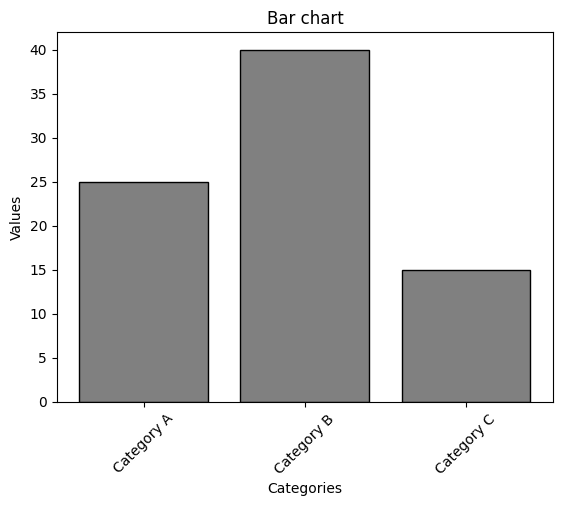

In [3]:
plt.title('Bar chart')
plt.bar(categories, values, color='grey', edgecolor='black')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

## 2. Line plot

Matplotlib [plot documentation page](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html).

In [4]:
# Generate data for a line plot
x = np.linspace(0, 10, 100)
y = np.sin(x)

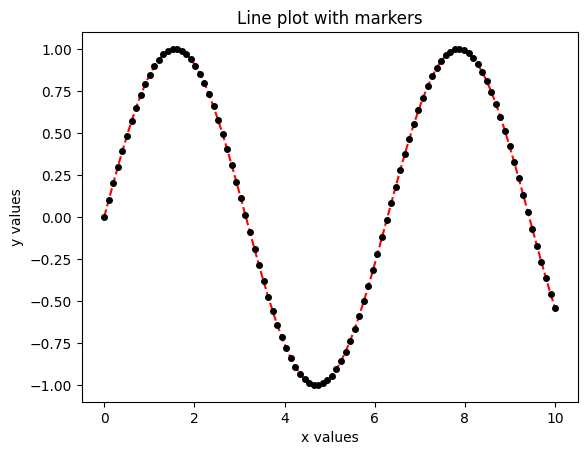

In [5]:
plt.title('Line plot with markers')

plt.plot(
    x,
    y,
    color='red',
    linestyle='--',
    marker='o',
    markerfacecolor='black',
    markeredgecolor='black',
    markersize=4
)

plt.xlabel('x values')
plt.ylabel('y values')

plt.show()

## 3. Scatter plot

Matplotlib [scatter plot documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html).

In [6]:
x = np.random.rand(100)
y = 2 * x + np.random.randn(100)

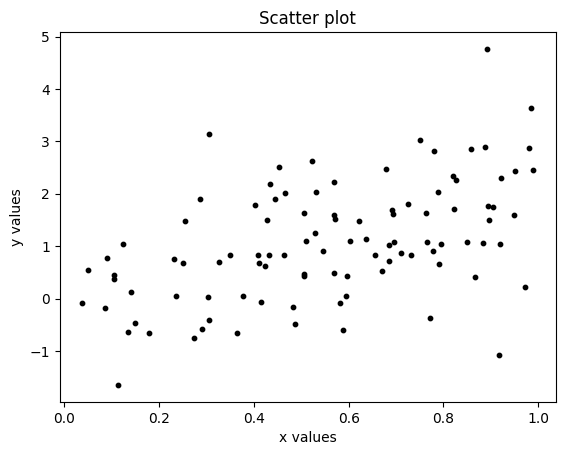

In [7]:
plt.title('Scatter plot')
plt.scatter(x, y, color='black', s=10)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

## 4. Distribution plots

### 4.1. Histogram

Matplotlib [histogram documentation page](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html).

In [8]:
data = np.random.normal(0, 1, 10000)

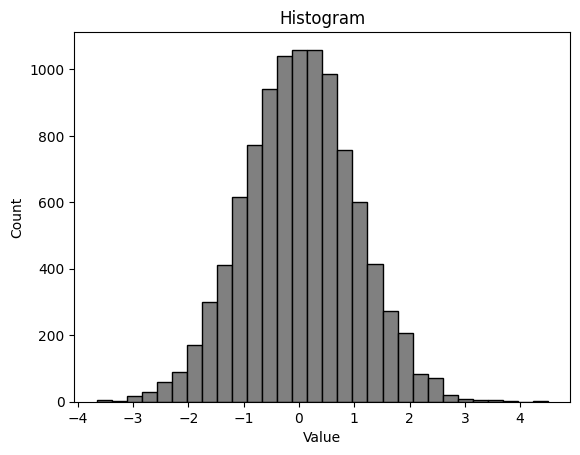

In [9]:
plt.title('Histogram')
plt.hist(data, bins=30, color='gray', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

### 1. Boxplot

Matplotlib [boxplot documentation page](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html).

In [10]:
# Generate data for a box plot
data = [
    np.random.normal(0, 1, 100),
    np.random.normal(0, 1.5, 100), 
    np.random.normal(0, 2, 100)
]

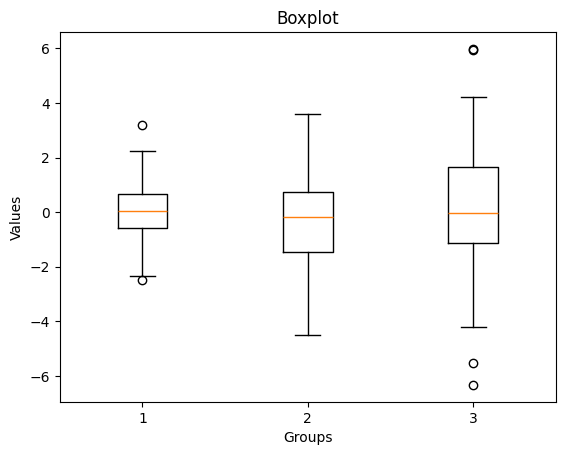

In [11]:
plt.title('Boxplot')
plt.boxplot(data)
plt.xlabel('Groups')
plt.ylabel('Values')
plt.show()

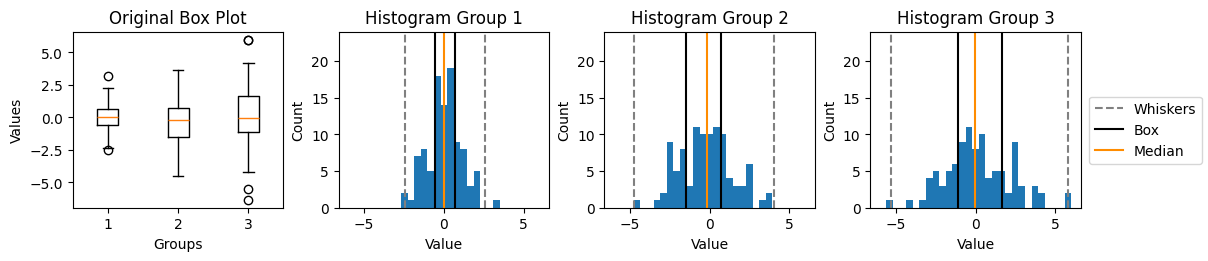

In [12]:
fig, axs = plt.subplots(1, 4, figsize=(12, 2.5), layout='constrained')
axs = axs.flatten()

# Original box plot
axs[0].set_title('Original Box Plot')
axs[0].boxplot(data)
axs[0].set_xlabel('Groups')
axs[0].set_ylabel('Values')

#########################################################
# Individual group histograms

# Calculate one set of bins for all three groups
bins = np.linspace(-6, 6, 30)

# Get the max count for group 1 to set a common y axis limit
counts, _  = np.histogram(data[0], bins=bins)
y_max = max(counts)

# Loop to plot each distribution
for i, distribution in enumerate(data):

    # Calculate quartiles and whiskers to add to histogram as vertical lines
    quartiles = np.percentile(distribution, [25, 50, 75])

    first_quartile = quartiles[0]
    median = quartiles[1]
    third_quartile = quartiles[2]

    iqr = third_quartile - first_quartile
    lower_whisker = first_quartile - 1.5 * iqr
    upper_whisker = third_quartile + 1.5 * iqr

    # Plot and annotate the histogram
    axs[i+1].set_title(f'Histogram Group {i+1}')
    axs[i+1].hist(distribution, bins=bins)
    axs[i+1].axvline(lower_whisker, color='grey', label='Whiskers', linestyle='--')
    axs[i+1].axvline(first_quartile, color='black', label='Box')
    axs[i+1].axvline(median, color='darkorange', label='Median')
    axs[i+1].axvline(third_quartile, color='black')
    axs[i+1].axvline(upper_whisker, color='grey', linestyle='--')
    axs[i+1].set_ylim(0, y_max + 5)
    axs[i+1].set_xlabel('Value')
    axs[i+1].set_ylabel('Count')

# Add a single legend for all 3 histogram subplots
handles, labels = axs[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='outside right center')

plt.show()

## 5. Customizing and combining plots

In [13]:
import pandas as pd

In [14]:
n = 1000
x = np.random.uniform(0, 10, n)

y1_linear = 0.5 * x + 10
y2_linear = 2.5 * x + 0.1

y1_noise = y1_linear + np.random.normal(0, 1, n)
y2_noise = y2_linear + np.random.normal(0, 1, n)

df = pd.DataFrame({
    'x': x,
    'y1_linear': y1_linear,
    'y2_linear': y2_linear,
    'y1_noise': y1_noise,
    'y2_noise': y2_noise
})

df.head()

,x,y1_linear,y2_linear,y1_noise,y2_noise
0,3.507207,11.753604,8.868018,12.764359,8.376567
1,4.389401,12.194700,11.073502,12.603895,11.322649
2,1.554339,10.777170,3.985849,9.609565,4.852867
3,8.784686,14.392343,22.061715,13.964591,20.051212
4,7.638566,13.819283,19.196415,12.899976,18.822388


In [ ]:
### Two features with legend

plt.scatter(df['x'], df['y1_noise'], label='Feature 1')
plt.scatter(df['x'], df['y2_noise'], label='Feature 2')
plt.legend()
plt.show()

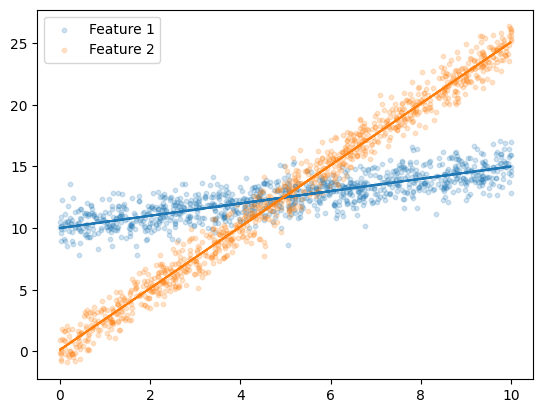

In [ ]:
plt.scatter(df['x'], df['y1_noise'], s=10, alpha=0.2, label='Feature 1')
plt.scatter(df['x'], df['y2_noise'], s=10, alpha=0.2, label='Feature 2')

plt.plot(df['x'], df['y1_linear'])
plt.plot(df['x'], df['y2_linear'])

plt.legend()
plt.show()

### Multiple subplots

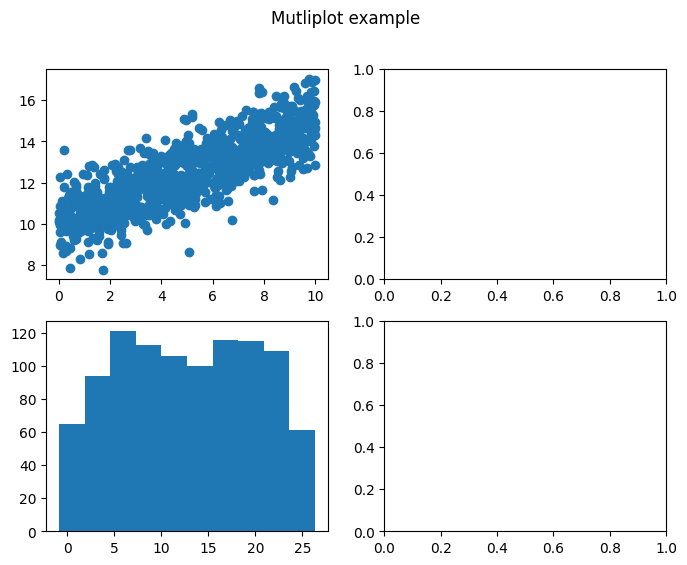

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6))
axs = axs.flatten()

fig.suptitle('Mutliplot example')

axs[0].scatter(df['x'], df['y1_noise'])


axs[2].hist(df['y2_noise'])

plt.savefig('incomplete_multiplot.png')
plt.show()

In [46]:
np.save('the_axis_array.npy', axs, allow_pickle=True)

In [48]:
new_axs = np.load('the_axis_array.npy', allow_pickle=True)
new_axs

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

In [51]:
new_axs[3].plot(df['x'], df['y1_linear'])
plt.show()